In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:02<00:00, 8.79MB/s]


In [ ]:
df_original = pd.read_csv("/content/walmart_data.csv?1641285094")
df_original

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


#**Section 1. Defining Problem Statement and Analyzing basic metrics (10 Points)**

#Defining Problem Statement

We wanted to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

Alse, we wanted to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

#Section 1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
df_original.shape

(550068, 10)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df = df_original.astype({'User_ID': object, 'Occupation': object, 'Product_Category': object,'Marital_Status': object})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
df.describe(include = "object")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933




---

# **Observation Insight of Section 1.1**


Total Records: There are 550,068 records in the dataset.

1. **Unique Users:** There are 5,891 unique User_IDs in the dataset.
Unique Products: There are 3,631 unique Product_IDs in the dataset


2. **Gender Distribution:** There are two genders: Male (M) and Female (F). The most frequent gender in the dataset is Male (M).


3. **Age Distribution:** Customers are categorized into 7 different age groups. The most common age group in the dataset is "26-35."

4. **Occupation Variety:** There are 21 different occupation codes. 4 is most common.

5. **City Categories:** Customers are categorized by their city of residence into three categories: A, B, and C. Maximum customers are from "B" city.

6. **Stay Duration:** Customers are categorized based on how long they have stayed in their current city. Most of the customers are living in the cities from 1 Year

7. **Marital Status:** The dataset includes information on marital status, with two categories: 0 (Not married) and 1 (Married). The most common status is "Not married."

8. **Product Categories:** There are 20 different product categories in the dataset. The most frequently occurring product category is 5.






#Section 1.2 Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
df["Gender"].value_counts()
# Checking how categorical variables contributes to the entire data
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
df[categ_cols].melt().groupby(['variable', 'value']).nunique()

Empty DataFrame
Columns: []
Index: [(Age, 0-17), (Age, 18-25), (Age, 26-35), (Age, 36-45), (Age, 46-50), (Age, 51-55), (Age, 55+), (City_Category, A), (City_Category, B), (City_Category, C), (Gender, F), (Gender, M), (Marital_Status, 0), (Marital_Status, 1), (Stay_In_Current_City_Years, 0), (Stay_In_Current_City_Years, 1), (Stay_In_Current_City_Years, 2), (Stay_In_Current_City_Years, 3), (Stay_In_Current_City_Years, 4+)]

In [ ]:

# Checking how categorical variables contributes to the entire data
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status','Occupation', "Product_Category"]
df[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

# **Observation Insight of Section 1.2**

#Insights:-

1. **Gender Distribution:** There are two genders: Male (M) and Female (F). 75% are Male and 25% are Female


2. **Age Distribution:** Customers are categorized into 7 different age groups. They are 0-17,18-25, 26-35,36-45,46-50,51-55, 55+. The most common age group in the dataset is "26-35."

3. **Occupation Variety:** There are 21 different occupation codes, coded as 1 to 21. 4 is most common.

4. **City Categories:** There are 3 cities "A", "B" and "C" with the percentage of 26%, 42%, 31% customers

5. **Marital Status:** 60% are Unmarried and 40% are Married

#Section 1.3 Visual Analysis - Univariate & Bivariate

#1.3.1Univariate

<Axes: xlabel='Occupation', ylabel='count'>

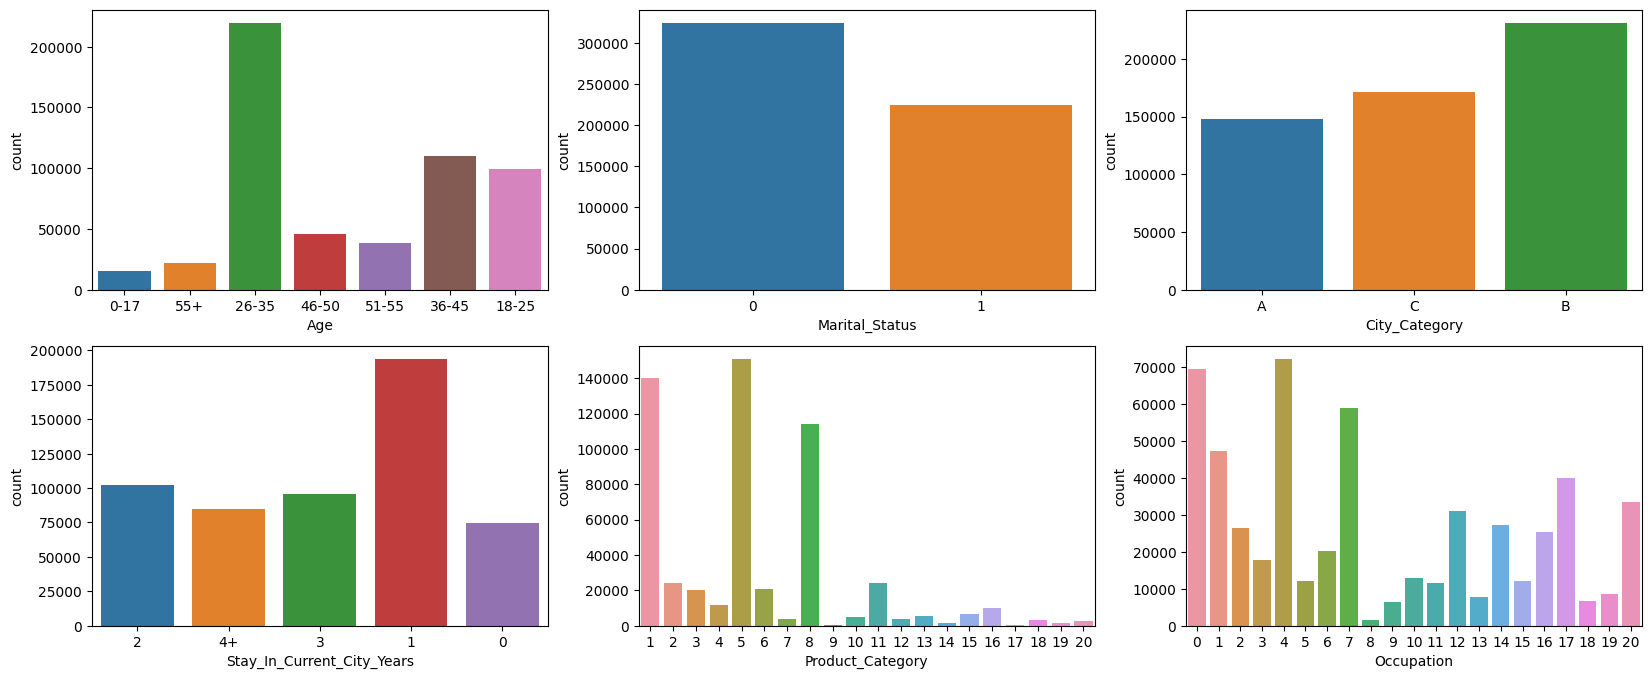

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
sns.countplot(data=df, x="Age", ax=axs[0,0])
sns.countplot(data=df, x="Marital_Status", ax=axs[0,1])
sns.countplot(data=df, x="City_Category", ax=axs[0,2])
sns.countplot(data=df, x="Stay_In_Current_City_Years", ax=axs[1,0])
sns.countplot(data=df, x="Product_Category", ax=axs[1,1])
sns.countplot(data=df, x="Occupation", ax=axs[1,2])

#Insight
Age: 26-35 age range have the highest 40% customers.

Marital Status- 60% are Unmarried and 40% are Married.

City Category - 42% customers lives in "B" City.

Stay in current city Years- 35% custimers stay in there city from 1 year.

Product Category - 1,5,8 have the highest sales. Need to keep the stock all the time.

Occupation- 4,0,7,1,17 are the top 5 occupation of our customer. We can give some offer to thse people.

#1.3.2. Bivariate

<Axes: xlabel='Occupation', ylabel='Purchase'>

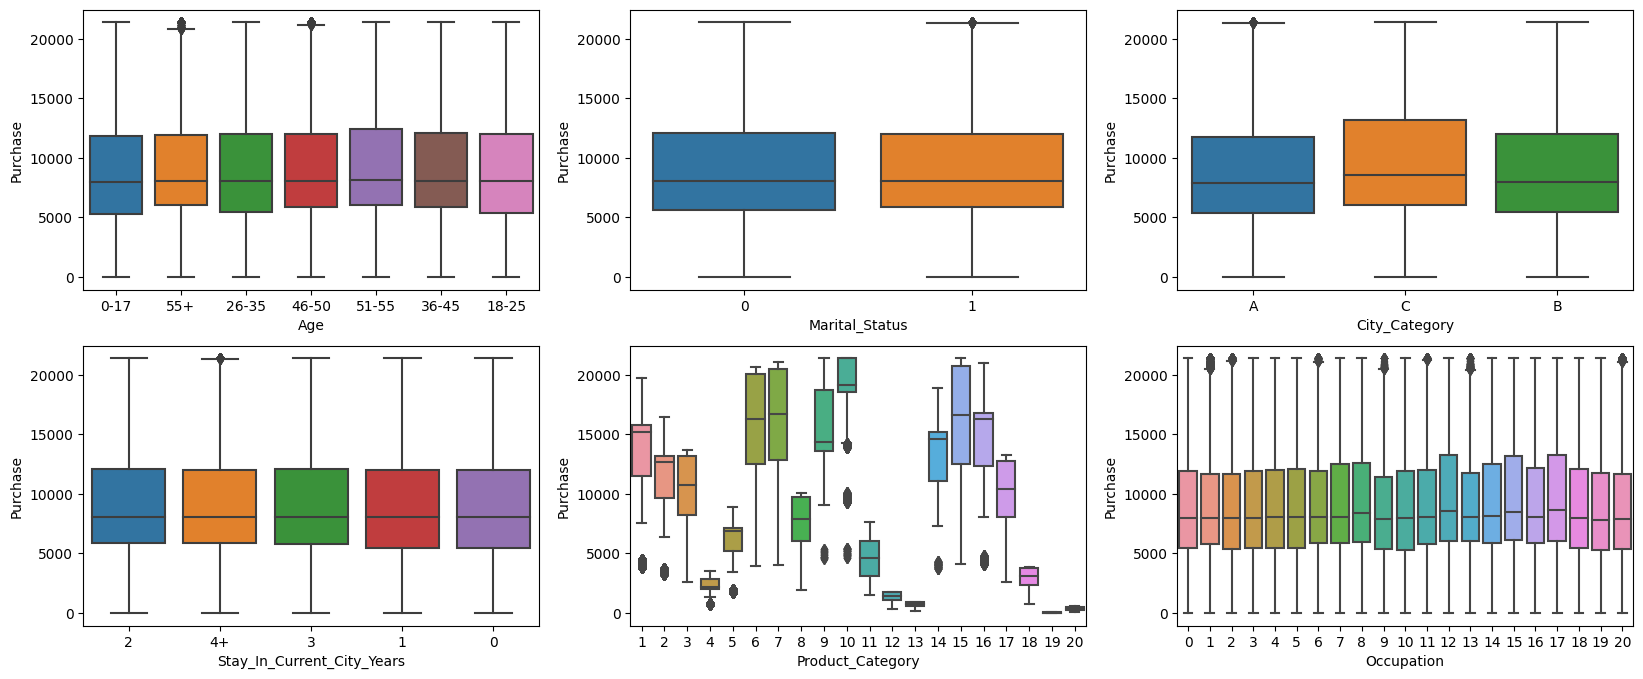

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
sns.boxplot(data=df, x="Age", y="Purchase",ax=axs[0,0])
sns.boxplot(data=df, x="Marital_Status", y="Purchase", ax=axs[0,1])
sns.boxplot(data=df, x="City_Category",y="Purchase", ax=axs[0,2])
sns.boxplot(data=df, x="Stay_In_Current_City_Years", y="Purchase", ax=axs[1,0])
sns.boxplot(data=df, x="Product_Category", y="Purchase", ax=axs[1,1])
sns.boxplot(data=df, x="Occupation", y="Purchase", ax=axs[1,2])

#Insights

Age - All age groups have similar average purchase amount capacity.

Marrital Status- Both married and Unmarried person average spending amount is same.

City- City "C" hamve the highest average purchase amount capacity among all the 3 cities.

Stay in current city Year- all the catagory of this variable have same average purchade amount.

Product Category- 1,6,7,9,10,14,15,16 these 8 products have the highest average purchase amount. We can focus to sell more products from these categories to increase the profit

Occupation- All the occupation types have approx similar average purchase amount.



#Section 2 Missing Value & Outlier Detection (10 Points)

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# **Observation**
There are no missing Values

<Axes: xlabel='Purchase'>

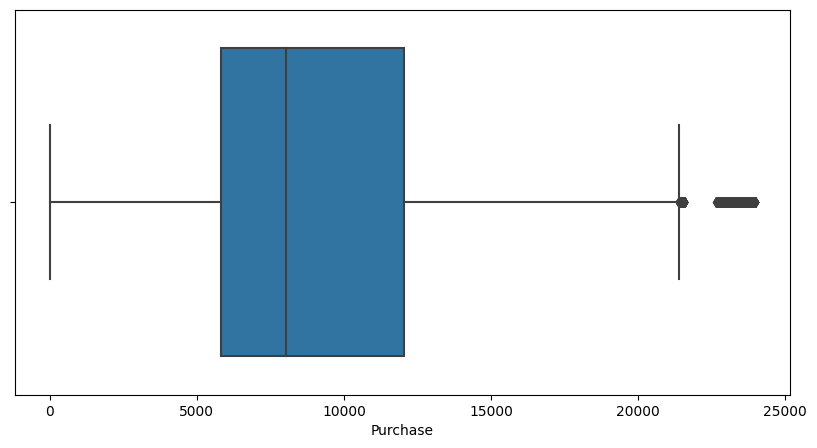

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x= "Purchase" )

# Observation
Outliers are present in the Purchase column. Following are the steps to treat the out lier.

In [ ]:
iqr = np.percentile(df["Purchase"],75) - np.percentile(df["Purchase"],25)
upper_limit = np.percentile(df["Purchase"],75) + (1.5*iqr)
upper_limit

21400.5

#List of High Spending Customer

In [ ]:
elite_customerlist = df[df["Purchase"] > upper_limit]
elite_customerlist["User_ID"].nunique()

1487

#Treating Outlier of Purchase

In [ ]:
q1 = df['Purchase'].quantile(0.25)
q3 = df['Purchase'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 +(1.5*iqr)
lower_limit = q1 -(1.5*iqr)

def outlier_treat(x):
  if x > upper_limit:
    return upper_limit
  if x < lower_limit:
    return lower_limit
  else:
    return x

df['Purchase'] = df["Purchase"].apply(outlier_treat)

<Axes: xlabel='Purchase'>

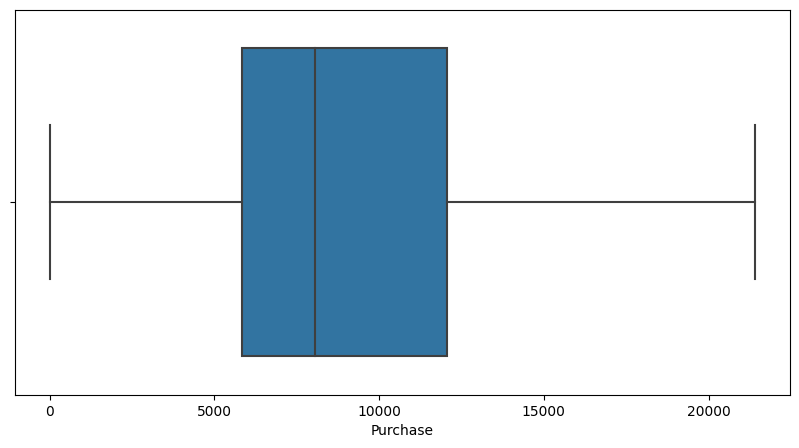

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = df["Purchase"], data = df )

#Section 3 Business Insights based on Non- Graphical and Visual Analysis (10 Points)


#*Section 3.1 Comments on the range of attributes*



1.   Customer Demographics available- Data contain the info of a customer's Gender, Marital Status, Age category , Occupation, the city they stay and from how long.
2.   Product Details available- Data contains the Product id and Product Category.
3. Order Details available. User id ans order amount is also available. One of the important data for analysis.


In [ ]:
df_original.corr()

<ipython-input-9-56b99c519564>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_original.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


#*Section 3.2 Comments on the distribution of the variables and relationship between them*
# 1. Distribution Insight


---


* **Unique Users:** There are 5,891 unique User_IDs in 5.5 Lakh records of datase.

* **Unique Products:** There are 3,631 unique Product_IDs in the dataset.

* **Gender Distribution:** There are two genders: Male (M) and Female (F). 75% of the Dataset are (M) male customers and 25% are (F) female.

* **Age Distribution:** Customers are categorized into 7 different age groups. they are 0-17, 18-25, 26-35, 36-45, 46-50, 51-55 and 55+. Most of the customers belongs from the Age group of "26-35" that is 40% of total customers.
The second and third highest age group is 35-35 with 20% and 18=25 with 18% respectively

* **Occupation Variety:** There are 21 different occupation codes, suggesting a diverse customer base with varying occupations. Occupation code 4,0 and 7 have the highest customer percentage of 13%, 12% and 10%.

* **City Categories:** Customers are categorized by their city of residence into three categories: A, B, and C. The most common category is "B." which is 42%. C is 31%.

* **Stay Duration:** Customers are categorized based on how long they have stayed in their current city. The most common category is "1 year." that is 35%.

* **Marital Status:** The dataset includes information on marital status, with two categories: 0 (Not married) and 1 (Married). The most common status is "Not married." which is 60%. 40% are married.

* **Product Categories:** There are 20 different product categories in the dataset. The most frequently occurring product category is 5,1 and 8 with 27%, 25% and 20%.

* **Purchase Amount:** 75% customers have the billing amount leass than 12054. The mean purchase amount id 8047. Min and max are 12 and 23K.

# 2. Relationship Insight


---


There is no relationship between any variables in the Dataset.


# *Section 3.3 Comments for each univariate and bivariate plot*
** Mentioned Below the every Univariate and Bivariate plots**

# Section 4 Answering questions (50 Points)





---



---
#**Population Mean and Population Standard Deviation of Male and Female**


---



---





In [ ]:
# Male data segrigation and Finding there mean and standard deviation

male_data = df[df['Gender']=="M"]
population_mean_male = male_data['Purchase'].mean()
population_sd_male = male_data['Purchase'].std()
print("Males Purchase Amount Mean:",population_mean_male)
print("Males Purchase Amount SD:",population_sd_male)
# Female data segrigation and Finding there mean and standard deviation
print("\n")
female_data = df[df['Gender']=="F"]
population_mean_female = female_data['Purchase'].mean()
population_sd_female = female_data['Purchase'].std()
print("Females Purchase Amount Mean:", population_mean_female)
print("Males Purchase Amount SD:",population_sd_female)

Males Purchase Amount Mean: 9428.373454771048
Males Purchase Amount SD: 5068.732811371384


Females Purchase Amount Mean: 8726.256326900279
Males Purchase Amount SD: 4743.242715572598


# Sample from Population

---------------------------------------------------------------------
---------------------------------------------------------------------
#Checking 50K sample means for 1000 time
---------------------------------------------------------------------
---------------------------------------------------------------------

In [ ]:
# for male

sample_mean_50K_M = [np.mean(male_data["Purchase"].sample(50000)) for i in range(1000)]
print( "Male Sample mean:" , np.mean(sample_mean_50K_M))

# For Femalle
sample_mean_50K_F = [np.mean(female_data["Purchase"].sample(50000)) for i in range(1000)]
print( "Female Sample mean:" , np.mean(sample_mean_50K_F))

Male Sample mean: 9437.953316280002
Female Sample mean: 8735.44386162



#Plotting Graph of male and Female  to Check Overlapping

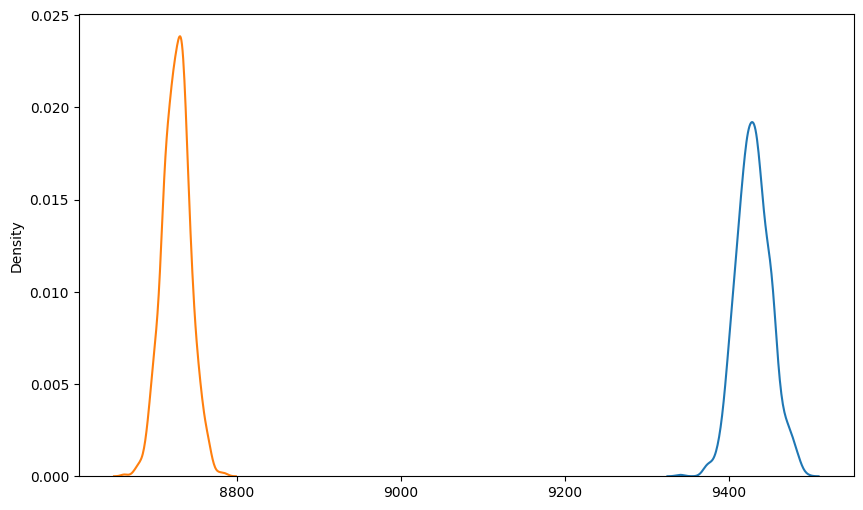

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_mean_50K_M)
sns.kdeplot(sample_mean_50K_F)
plt.show()

*Graphs are too far away and too sharp because of high sampalings*

----------------------------------------------
-----------------------------------------------
#Taking Mean of 3500 samples for 1000 time
-------------------------------------
---------------------------------------

In [ ]:
sample_mean_3_5k_M= [np.mean(male_data["Purchase"].sample(3500)) for i in range(1000)]
print(np.mean(sample_mean_3_5k_M))

sample_mean_3_5k_F= [np.mean(female_data["Purchase"].sample(3500)) for i in range(1000)]
print(np.mean(sample_mean_3_5k_F))

9430.384042142858
8724.723053285714


#Ploting Kdetplot for 1000 Means of 3.5K Sampaling

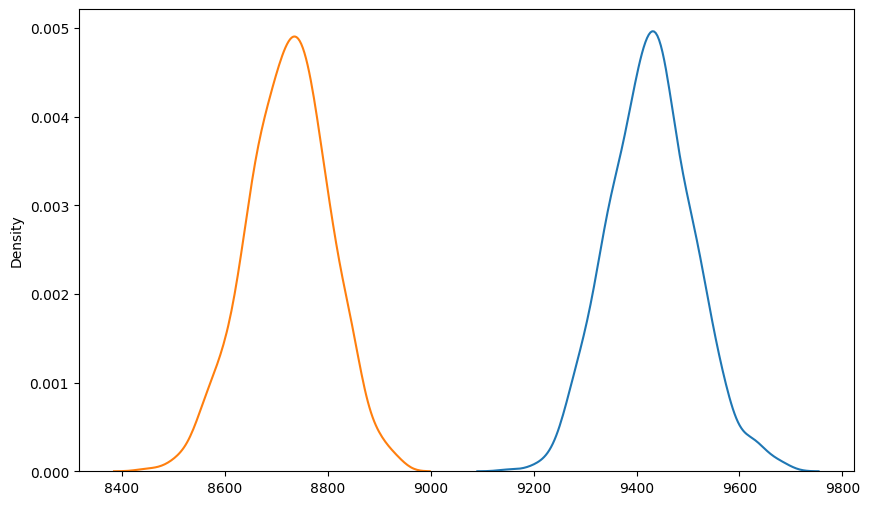

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_mean_3_5k_M)
sns.kdeplot(sample_mean_3_5k_F)
plt.show()

*We can see that the graphs are not overlapping. Now we can find the 95% or 99% confidence interval of Male and Female Purchase amount*
--------------------------------------------------------------------------------

#Values of 90% confidence interval of Gender

In [ ]:
# Calculation For Male
mean_3_5K = np.mean(sample_mean_3_5k_M)
standard_error= population_sd_male/(3500**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_3_5K +(z1 * standard_error)
x2 = mean_3_5K +(z2 * standard_error)
print("Male 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print("standard_error:", standard_error)
print('We can say by 90% confidence that the mean amount a men can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation for Female

mean_3_5K = np.mean(sample_mean_3_5k_F)
standard_error = population_sd_female/(3500**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_3_5K +(z1 * standard_error)
x2 = mean_3_5K +(z2 * standard_error)
print("Female 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print("standard_error:", standard_error)
print('We can say by 90% confidence that the mean amount a women can spend in walmart is between', x1, "to", x2)

Male 90% confidence interval values
x1: 9289.457552735983
x2: 9656.987753581983
standard_error: 80.17543524552448
We can say by 90% confidence that the mean amount a men can spend in walmart is between 9289.457552735983 to 9656.987753581983


Female 95% confidence interval values
x1: 8592.8461978297
x2: 8936.775343987252
standard_error: 80.17543524552448
We can say by 90% confidence that the mean amount a women can spend in walmart is between 8592.8461978297 to 8936.775343987252


#Values of 95% confidence interval of Gender

In [ ]:
# Calculation For Male
mean_3_5K = np.mean(sample_mean_3_5k_M)
standard_error= population_sd_male/(3500**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_3_5K +(z1 * standard_error)
x2 = mean_3_5K +(z2 * standard_error)
print("Male 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print("standard_error:", standard_error)
print('We can say by 95% confidence that the mean amount a men can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation for Female

mean_3_5K = np.mean(sample_mean_3_5k_F)
standard_error = population_sd_female/(3500**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_3_5K +(z1 * standard_error)
x2 = mean_3_5K +(z2 * standard_error)
print("Female 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print("standard_error:", standard_error)
print('We can say by 95% confidence that the mean amount a women can spend in walmart is between', x1, "to", x2)

Male 95% confidence interval values
x1: 9262.459772664204
x2: 9683.985533653762
standard_error: 85.67722203225121
We can say by 95% confidence that the mean amount a men can spend in walmart is between 9262.459772664204 to 9683.985533653762


Female 95% confidence interval values
x1: 8567.582087759663
x2: 8962.039454057289
standard_error: 80.17543524552448
We can say by 95% confidence that the mean amount a women can spend in walmart is between 8567.582087759663 to 8962.039454057289


#Values of 99% confidence interval of Gender

In [ ]:
# Calculation For Male
mean_3_5K = np.mean(sample_mean_3_5k_M)
standard_error= population_sd_male/(3500**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_3_5K +(z1 * standard_error)
x2 = mean_3_5K +(z2 * standard_error)
print("Male 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print("standard_error:", standard_error)
print('We can say by 99% confidence that the mean amount a men can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation for Female

mean_3_5K = np.mean(sample_mean_3_5k_F)
standard_error = population_sd_female/(3500**0.5)
z1 = norm.ppf(0.01)
z2 = 1 - norm.ppf(0.01)
x1 = mean_3_5K +(z1 * standard_error)
x2 = mean_3_5K +(z2 * standard_error)
print("Female 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print("standard_error:", standard_error)
print('We can say by 99% confidence that the mean amount a women can spend in walmart is between', x1, "to", x2)

Male 99% confidence interval values
x1: 9209.69414298552
x2: 9736.751163332447
standard_error: 85.67722203225121
We can say by 99% confidence that the mean amount a men can spend in walmart is between 9209.69414298552 to 9736.751163332447


Female 99% confidence interval values
x1: 8538.20709995199
x2: 8991.414441864963
standard_error: 80.17543524552448
We can say by 99% confidence that the mean amount a women can spend in walmart is between 8538.20709995199 to 8991.414441864963


#Section 4.1 Are women spending more money per transaction than men? Why or Why not? (10 Points)

**No, women are not spending more Money then men.**

We can say this because when we calculated the Central Limt mean it was 9430.38 for male with standrad error of 85.67 and 8724.72 for female with standard error of 80.17

#Section 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
Instructions to be followed:-

Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.


Answer


So when we calculated the the range of mean spend with 90% confidence interval it is 9289.45 to 9656.98 for male and 8592.84 to 8936.77 for female.


So when we calculated the the range of mean spend with 95% confidence interval it is 9262.46 to 9683.98 for male and  8567.58 to 8962.03 for female.


So when we calculated the the range of mean spend with 99% confidence interval it is 9209.69 to 9736.75 for male and 8538.20 to 8991.41 for female.

#Section 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)


No, with 99% of confidence interval also, the average spending of male and female is not overlapping.

walmart can leverage this by the following changes and improvements.

* **Gender-Specific Marketing Campaigns:**Create tailored marketing campaigns that resonate with each gender's preferences and interests. This includes using gender-specific messaging, imagery, and advertising channels.

* **Pricing Strategies:** Fine-tune pricing strategies based on gender preferences. Consider introducing pricing tiers, discounts, or bundled offers that are more appealing to one gender over the other.

* **Market Expansion:** Consider expanding into new markets or demographics that align with the higher-spending gender group.





---



---


# **Section 4.4 Results when the same activity is performed for Married vs Unmarried (10 Points)**


---



---



In [ ]:
married_data = df[df['Marital_Status']==1]
population_mean_married = married_data['Purchase'].mean()
population_sd_married = married_data['Purchase'].std()
print("Married Purchase Amount Mean:",population_mean_married)
print("Married Purchase Amount SD:",population_sd_married)
# Female data segrigation and Finding there mean and standard deviation
print("\n")
unmarried_data = df[df['Marital_Status']==0]
population_mean_unmarried = unmarried_data['Purchase'].mean()
population_sd_unmarried = unmarried_data['Purchase'].std()
print("Unmarried Purchase Amount Mean:", population_mean_unmarried)
print("Unmarried Purchase Amount SD:",population_sd_unmarried)

Married Purchase Amount Mean: 9251.430701571424
Married Purchase Amount SD: 4991.196933307116


Unmarried Purchase Amount Mean: 9257.517959480308
Unmarried Purchase Amount SD: 5005.287278481116


#**Married and Unmarried CLTs and CIs**

In [ ]:
# for male

sample_mean_50K_1 = [np.mean(married_data["Purchase"].sample(50000)) for i in range(1000)]
print( "Married Sample mean:" , np.mean(sample_mean_50K_1))

# For Femalle
sample_mean_50K_0 = [np.mean(unmarried_data["Purchase"].sample(50000)) for i in range(1000)]
print( "Unmarried Sample mean:" , np.mean(sample_mean_50K_0))

Married Sample mean: 9250.56996469
Unmarried Sample mean: 9257.127020949998


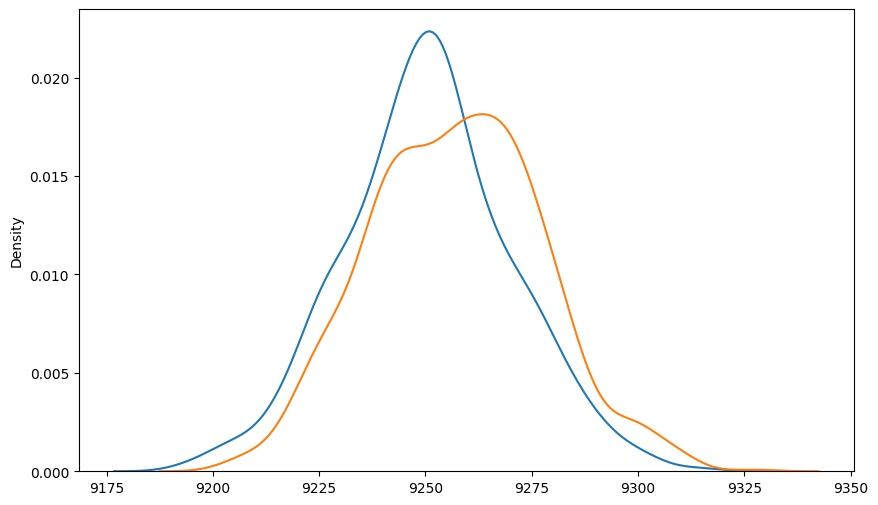

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_mean_50K_1)
sns.kdeplot(sample_mean_50K_0)
plt.show()

#3500 samplings with 1200 means

In [ ]:
# for male

sample_mean_35K_1 = [np.mean(married_data["Purchase"].sample(3500)) for i in range(1200)]
print( "Married Sample mean:" , np.mean(sample_mean_35K_1))

# For Femalle
sample_mean_35K_0 = [np.mean(unmarried_data["Purchase"].sample(3500)) for i in range(1200)]
print( "Unmarried Sample mean:" , np.mean(sample_mean_35K_0))

Married Sample mean: 9250.297405238096
Unmarried Sample mean: 9259.313552619047


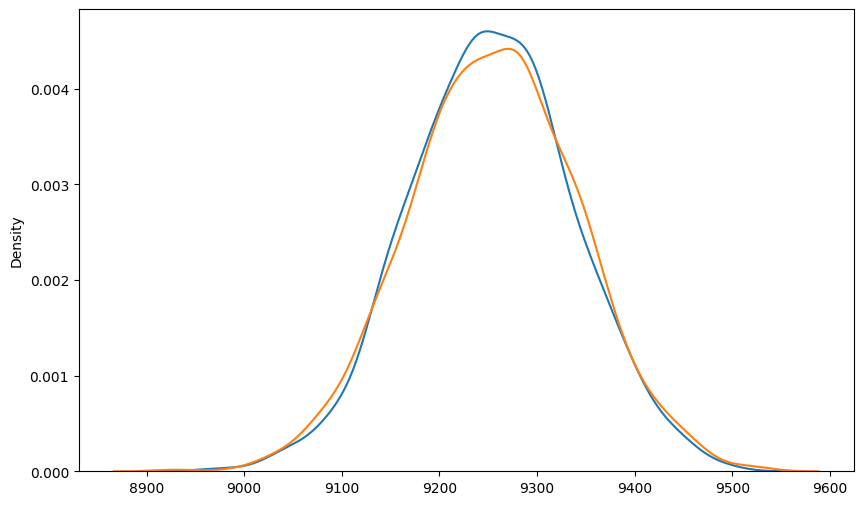

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_mean_35K_1)
sns.kdeplot(sample_mean_35K_0)
plt.show()

#90% confidence interval of Marrital Status

In [ ]:
# Calculation For Male
mean_35K_married = np.mean(sample_mean_35K_1)
standard_error= population_sd_married/(3500**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_35K_married +(z1 * standard_error)
x2 = mean_35K_married +(z2 * standard_error)
print("Married 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print("standard_error of married:",standard_error)
print('We can say by 90% confidence that the mean amount a Married can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation for Female

mean_35K_unmarried = np.mean(sample_mean_35K_0)
standard_error = population_sd_unmarried /(3500**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_35K_unmarried +(z1 * standard_error)
x2 = mean_35K_unmarried +(z2 * standard_error)
print("Unmarried 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print("standard_error of unmarried:",standard_error)
print('We can say by 90% confidence that the mean amount an Unmarried can spend in walmart is between', x1, "to", x2)

Married 90% confidence interval values
x1: 9116.569381379182
x2: 9480.341031908378
standard_error of married: 84.80104328756278
We can say by 90% confidence that the mean amount a Married can spend in walmart is between 9116.569381379182 to 9480.341031908378


Unmarried 90% confidence interval values
x1: 9127.971627510335
x2: 9492.501034954366
standard_error of unmarried: 84.97768865518015
We can say by 90% confidence that the mean amount an Unmarried can spend in walmart is between 9127.971627510335 to 9492.501034954366


#95% confidence interval Values of Marrital Status

In [ ]:
# Calculation For Male
mean_35K_married = np.mean(sample_mean_35K_1)
standard_error= population_sd_married/(3500**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_35K_married +(z1 * standard_error)
x2 = mean_35K_married +(z2 * standard_error)
print("Married 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 95% confidence that the mean amount a Married can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation for Female

mean_35K_unmarried = np.mean(sample_mean_35K_0)
standard_error = population_sd_unmarried /(3500**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_35K_unmarried +(z1 * standard_error)
x2 = mean_35K_unmarried +(z2 * standard_error)
print("Unmarried 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 95% confidence that the mean amount an Unmarried can spend in walmart is between', x1, "to", x2)

Married 95% confidence interval values
x1: 9084.941855825553
x2: 9500.019581138087
We can say by 95% confidence that the mean amount a Married can spend in walmart is between 9084.941855825553 to 9500.019581138087


Unmarried 95% confidence interval values
x1: 9093.49119798948
x2: 9509.74070403955
We can say by 95% confidence that the mean amount an Unmarried can spend in walmart is between 9093.49119798948 to 9509.74070403955


# 99% Confidence interval Values of Marrital Status

In [ ]:
# Calculation For Male
mean_35K_married = np.mean(sample_mean_35K_1)
standard_error= population_sd_married/(3500**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_35K_married +(z1 * standard_error)
x2 = mean_35K_married +(z2 * standard_error)
print("Married 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount a Married can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation for Female

mean_35K_unmarried = np.mean(sample_mean_35K_0)
standard_error = population_sd_unmarried /(3500**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_35K_unmarried +(z1 * standard_error)
x2 = mean_35K_unmarried +(z2 * standard_error)
print("Unmarried 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount an Unmarried can spend in walmart is between', x1, "to", x2)

Married 90% confidence interval values
x1: 9032.983376490161
x2: 9551.97806047348
We can say by 90% confidence that the mean amount a Married can spend in walmart is between 9032.983376490161 to 9551.97806047348


Unmarried 90% confidence interval values
x1: 9041.386037824153
x2: 9561.845864204879
We can say by 90% confidence that the mean amount an Unmarried can spend in walmart is between 9041.386037824153 to 9561.845864204879


# Insights of Section 4.4

# Insights of effect of Marital Status :

* According to CLT the graph of Purchase amount for married and unmarried is completely overlapped.



* The range of 99% confidence interval for married is 9032.98 to 9551.97 and for unmarried is 9041.38 to 9561.84




* Since there isn't a significant difference in average purchase amounts based on marital status, we may choose not to prioritize marketing campaigns that specifically target one group over the other. Instead, focus on more general marketing strategies that cater to a broader audience.



* Rather than relying solely on marital status, explore other customer segmentation criteria that might have a more significant impact on purchase behavior. Analyze customer demographics, behaviors, or preferences to identify more meaningful segments.



* While marital status might not be a strong determinant of purchase amount, other factors could be influencing individual purchasing decisions. Consider collecting more detailed customer data and using it for personalized marketing and product recommendations.



---



---


# **Section 4.5 Results when the same activity is performed for Age (10 Points)**


---



---



In [ ]:
age_0_17= df[df['Age']=="0-17"]
population_mean_0_17 = age_0_17['Purchase'].mean()
population_sd_0_17 = age_0_17['Purchase'].std()
print("0-17 Purchase Amount Mean:",population_mean_0_17)
print("0_17 Purchase Amount SD:",population_sd_0_17)


print("\n")
age_18_25= df[df['Age']=="18-25"]
population_mean_18_25 = age_18_25['Purchase'].mean()
population_sd_18_25 = age_18_25['Purchase'].std()
print("18-25 Purchase Amount Mean:",population_mean_0_17)
print("18-25 Purchase Amount SD:",population_sd_0_17)


print("\n")
age_26_35= df[df['Age']=="26-35"]
population_mean_26_35 = age_26_35['Purchase'].mean()
population_sd_26_35 = age_26_35['Purchase'].std()
print("26-35 Purchase Amount Mean:",population_mean_26_35)
print("26-35 Purchase Amount SD:",population_sd_26_35)


print("\n")
age_36_45= df[df['Age']=="36-45"]
population_mean_36_45 = age_36_45['Purchase'].mean()
population_sd_36_45 = age_36_45['Purchase'].std()
print("36-45 Purchase Amount Mean:",population_mean_36_45)
print("36-45 Purchase Amount SD:",population_sd_36_45)


age_46_50= df[df['Age']=="46-50"]
population_mean_46_50 = age_46_50['Purchase'].mean()
population_sd_46_50 = age_46_50['Purchase'].std()
print("46-50 Purchase Amount Mean:",population_mean_46_50)
print("46-50 Purchase Amount SD:",population_sd_46_50)


print("\n")
age_51_55= df[df['Age']=="51-55"]
population_mean_46_50 = age_51_55['Purchase'].mean()
population_sd_46_50 = age_51_55['Purchase'].std()
print("46-50 Purchase Amount Mean:",population_mean_46_50)
print("46-50 Purchase Amount SD:",population_sd_46_50)


print("\n")
age_55= df[df['Age']=="55+"]
population_mean_55 = age_55['Purchase'].mean()
population_sd_55 = age_55['Purchase'].std()
print("55+ Purchase Amount Mean:",population_mean_55)
print("55+ Purchase Amount SD:",population_sd_55)


0-17 Purchase Amount Mean: 8925.539597404317
0_17 Purchase Amount SD: 5090.078413934703


18-25 Purchase Amount Mean: 8925.539597404317
18-25 Purchase Amount SD: 5090.078413934703


26-35 Purchase Amount Mean: 9244.947059707541
26-35 Purchase Amount SD: 4990.086123865471


36-45 Purchase Amount Mean: 9320.888549535055
36-45 Purchase Amount SD: 4995.487782443173
46-50 Purchase Amount Mean: 9198.531093411522
46-50 Purchase Amount SD: 4940.249496025767


46-50 Purchase Amount Mean: 9519.560427001896
46-50 Purchase Amount SD: 5048.447704263128


55+ Purchase Amount Mean: 9319.768740699405
55+ Purchase Amount SD: 4968.014655516128


#15000 sampalings and 1000 times

In [ ]:
# for male

sample_mean_10K_0_17 = [np.mean(age_0_17["Purchase"].sample(10000)) for i in range(1000)]
print( "0-17 Age group Sample mean:" , np.mean(sample_mean_10K_0_17))

# For Femalle
sample_mean_10K_18_25 = [np.mean(age_18_25["Purchase"].sample(10000)) for i in range(1000)]
print( "18-25 Age group Sample mean:" , np.mean(sample_mean_10K_18_25))

sample_mean_10K_26_35 = [np.mean(age_26_35["Purchase"].sample(10000)) for i in range(1000)]
print( "26-35 Age group Sample mean:" , np.mean(sample_mean_10K_26_35))

sample_mean_10K_36_45 = [np.mean(age_36_45["Purchase"].sample(10000)) for i in range(1000)]
print( "36-45 Age group Sample mean:" , np.mean(sample_mean_10K_36_45))

sample_mean_10K_45_50 = [np.mean(age_46_50["Purchase"].sample(10000)) for i in range(1000)]
print( "45-50 Age group Sample mean:" , np.mean(sample_mean_10K_45_50))

sample_mean_10K_51_55 = [np.mean(age_51_55["Purchase"].sample(10000)) for i in range(1000)]
print( "51-55 Age group Sample mean:" , np.mean(sample_mean_10K_51_55))

sample_mean_10K_55 = [np.mean(age_55["Purchase"].sample(10000)) for i in range(1000)]
print( "55+ Age group Sample mean:" , np.mean(sample_mean_10K_55))

0-17 Age group Sample mean: 8925.8885992
18-25 Age group Sample mean: 9160.966896899998
26-35 Age group Sample mean: 9245.035157949998
36-45 Age group Sample mean: 9321.38261185
45-50 Age group Sample mean: 9198.31464965
51-55 Age group Sample mean: 9521.294892599999
55+ Age group Sample mean: 9320.94949545


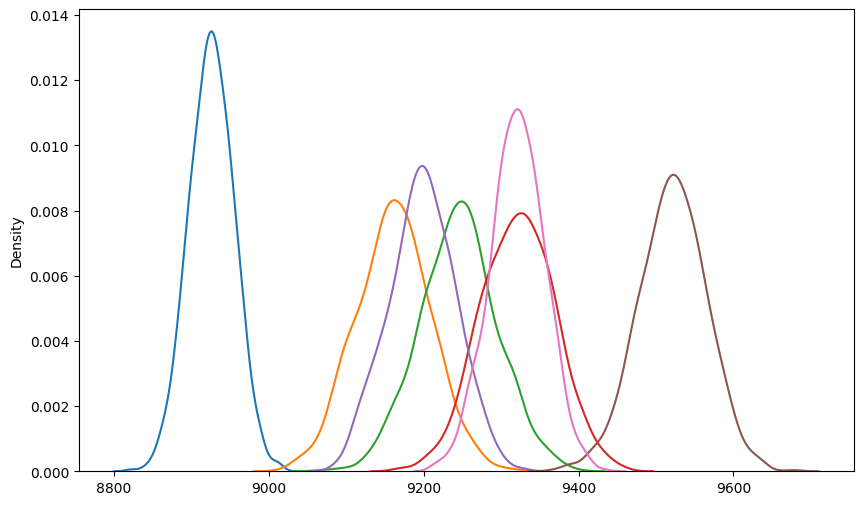

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_mean_10K_0_17)
sns.kdeplot(sample_mean_10K_18_25)
sns.kdeplot(sample_mean_10K_26_35)
sns.kdeplot(sample_mean_10K_36_45)
sns.kdeplot(sample_mean_10K_45_50)
sns.kdeplot(sample_mean_10K_51_55)
sns.kdeplot(sample_mean_10K_55)
plt.show()

#90% Confidence interval Values of all the Age groups

In [ ]:
# Calculation For 0-17
mean_10K_0_17 = np.mean(sample_mean_10K_0_17)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_10K_0_17 +(z1 * standard_error)
x2 = mean_10K_0_17 +(z2 * standard_error)
print("Age group 0-17 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount 0-17 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation For 18-25
mean_10K_18_25 = np.mean(sample_mean_10K_18_25)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_10K_18_25+(z1 * standard_error)
x2 = mean_10K_18_25 +(z2 * standard_error)
print("Age group 18-25 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount 18-25 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 26-35
mean_10K_26_35 = np.mean(sample_mean_10K_26_35)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_10K_26_35 +(z1 * standard_error)
x2 = mean_10K_26_35 +(z2 * standard_error)
print("Age group 26-35 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount 26-35 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 36-45
mean_10K_36_45 = np.mean(sample_mean_10K_36_45)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_10K_36_45 +(z1 * standard_error)
x2 = mean_10K_36_45 +(z2 * standard_error)
print("Age group 36-45 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount 36-45 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 45-50
mean_10K_45_50 = np.mean(sample_mean_10K_45_50)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_10K_45_50 +(z1 * standard_error)
x2 = mean_10K_45_50 +(z2 * standard_error)
print("Age group 45-50 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount 45-50 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 51-55
mean_10K_51_55 = np.mean(sample_mean_10K_51_55)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_10K_51_55 +(z1 * standard_error)
x2 = mean_10K_51_55 +(z2 * standard_error)
print("Age group 51-55 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount 51-55 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation For 55+
mean_10K_55 = np.mean(sample_mean_10K_55)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.05)
z2 = 1 - norm.ppf(0.05)
x1 = mean_10K_55 +(z1 * standard_error)
x2 = mean_10K_55 +(z2 * standard_error)
print("Age group 55+ 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 90% confidence that the mean amount 55+ Age group person can spend in walmart is between', x1, "to", x2)
print("\n")



Age group 0-17 90% confidence interval values
x1: 8842.16425979372
x2: 9060.513722745625
We can say by 90% confidence that the mean amount 0-17 Age group person can spend in walmart is between 8842.16425979372 to 9060.513722745625


Age group 18-25 90% confidence interval values
x1: 9077.242557493719
x2: 9295.592020445623
We can say by 90% confidence that the mean amount 18-25 Age group person can spend in walmart is between 9077.242557493719 to 9295.592020445623


Age group 26-35 90% confidence interval values
x1: 9161.31081854372
x2: 9379.660281495624
We can say by 90% confidence that the mean amount 26-35 Age group person can spend in walmart is between 9161.31081854372 to 9379.660281495624


Age group 36-45 90% confidence interval values
x1: 9237.658272443721
x2: 9456.007735395626
We can say by 90% confidence that the mean amount 36-45 Age group person can spend in walmart is between 9237.658272443721 to 9456.007735395626


Age group 45-50 90% confidence interval values
x1: 9114.59

#95% Confidence Interval Values of all Age groups

In [ ]:
# Calculation For 0-17
mean_10K_0_17 = np.mean(sample_mean_10K_0_17)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_10K_0_17 +(z1 * standard_error)
x2 = mean_10K_0_17 +(z2 * standard_error)
print("Age group 0-17 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 95% confidence that the mean amount 0-17 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation For 18-25
mean_10K_18_25 = np.mean(sample_mean_10K_18_25)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_10K_18_25+(z1 * standard_error)
x2 = mean_10K_18_25 +(z2 * standard_error)
print("Age group 18-25 90% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 95% confidence that the mean amount 18-25 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 26-35
mean_10K_26_35 = np.mean(sample_mean_10K_26_35)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_10K_26_35 +(z1 * standard_error)
x2 = mean_10K_26_35 +(z2 * standard_error)
print("Age group 26-35 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say with 95% confidence that the mean amount 26-35 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 36-45
mean_10K_36_45 = np.mean(sample_mean_10K_36_45)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_10K_36_45 +(z1 * standard_error)
x2 = mean_10K_36_45 +(z2 * standard_error)
print("Age group 36-45 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say with 95% confidence that the mean amount 36-45 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 45-50
mean_10K_45_50 = np.mean(sample_mean_10K_45_50)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_10K_45_50 +(z1 * standard_error)
x2 = mean_10K_45_50 +(z2 * standard_error)
print("Age group 45-50 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say with 95% confidence that the mean amount 45-50 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 51-55
mean_10K_51_55 = np.mean(sample_mean_10K_51_55)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_10K_51_55 +(z1 * standard_error)
x2 = mean_10K_51_55 +(z2 * standard_error)
print("Age group 51-55 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say with 95% confidence that the mean amount 51-55 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation For 55+
mean_10K_55 = np.mean(sample_mean_10K_55)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.025)
z2 = 1 - norm.ppf(0.025)
x1 = mean_10K_55 +(z1 * standard_error)
x2 = mean_10K_55 +(z2 * standard_error)
print("Age group 55+ 95% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say with 95% confidence that the mean amount 55+ Age group person can spend in walmart is between', x1, "to", x2)
print("\n")


Age group 0-17 90% confidence interval values
x1: 8826.124895502031
x2: 9076.553087037315
We can say by 95% confidence that the mean amount 0-17 Age group person can spend in walmart is between 8826.124895502031 to 9076.553087037315


Age group 18-25 90% confidence interval values
x1: 9061.203193202029
x2: 9311.631384737313
We can say by 95% confidence that the mean amount 18-25 Age group person can spend in walmart is between 9061.203193202029 to 9311.631384737313


Age group 26-35 95% confidence interval values
x1: 9145.27145425203
x2: 9395.699645787314
We can say with 95% confidence that the mean amount 26-35 Age group person can spend in walmart is between 9145.27145425203 to 9395.699645787314


Age group 36-45 95% confidence interval values
x1: 9221.618908152032
x2: 9472.047099687315
We can say with 95% confidence that the mean amount 36-45 Age group person can spend in walmart is between 9221.618908152032 to 9472.047099687315


Age group 45-50 95% confidence interval values
x1: 9

#99% Confidence interval Values for all the age Groups

In [ ]:
# Calculation For 0-17
mean_10K_0_17 = np.mean(sample_mean_10K_0_17)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_10K_0_17 +(z1 * standard_error)
x2 = mean_10K_0_17 +(z2 * standard_error)
print("Age group 0-17 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 99% confidence that the mean amount 0-17 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation For 18-25
mean_10K_18_25 = np.mean(sample_mean_10K_18_25)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_10K_18_25+(z1 * standard_error)
x2 = mean_10K_18_25 +(z2 * standard_error)
print("Age group 18-25 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 99% confidence that the mean amount 18-25 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 26-35
mean_10K_26_35 = np.mean(sample_mean_10K_26_35)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_10K_26_35 +(z1 * standard_error)
x2 = mean_10K_26_35 +(z2 * standard_error)
print("Age group 26-35 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 99% confidence that the mean amount 26-35 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 36-45
mean_10K_36_45 = np.mean(sample_mean_10K_36_45)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_10K_36_45 +(z1 * standard_error)
x2 = mean_10K_36_45 +(z2 * standard_error)
print("Age group 36-45 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 99% confidence that the mean amount 36-45 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 45-50
mean_10K_45_50 = np.mean(sample_mean_10K_45_50)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_10K_45_50 +(z1 * standard_error)
x2 = mean_10K_45_50 +(z2 * standard_error)
print("Age group 45-50 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 99% confidence that the mean amount 45-50 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")

# Calculation For 51-55
mean_10K_51_55 = np.mean(sample_mean_10K_51_55)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_10K_51_55 +(z1 * standard_error)
x2 = mean_10K_51_55 +(z2 * standard_error)
print("Age group 51-55 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 99% confidence that the mean amount 51-55 Age group person can spend in walmart is between', x1, "to", x2)
print("\n")


# Calculation For 55+
mean_10K_55 = np.mean(sample_mean_10K_55)
standard_error= population_sd_0_17/(10000**0.5)
z1 = norm.ppf(0.005)
z2 = 1 - norm.ppf(0.005)
x1 = mean_10K_55 +(z1 * standard_error)
x2 = mean_10K_55 +(z2 * standard_error)
print("Age group 55+ 99% confidence interval values")
print("x1:", x1)
print("x2:", x2)
print('We can say by 99% confidence that the mean amount 55+ Age group person can spend in walmart is between', x1, "to", x2)
print("\n")


Age group 0-17 99% confidence interval values
x1: 8794.776867840252
x2: 9107.901114699094
We can say by 99% confidence that the mean amount 0-17 Age group person can spend in walmart is between 8794.776867840252 to 9107.901114699094


Age group 18-25 99% confidence interval values
x1: 9029.85516554025
x2: 9342.979412399092
We can say by 99% confidence that the mean amount 18-25 Age group person can spend in walmart is between 9029.85516554025 to 9342.979412399092


Age group 26-35 99% confidence interval values
x1: 9113.92342659025
x2: 9427.047673449093
We can say by 99% confidence that the mean amount 26-35 Age group person can spend in walmart is between 9113.92342659025 to 9427.047673449093


Age group 36-45 99% confidence interval values
x1: 9190.270880490252
x2: 9503.395127349095
We can say by 99% confidence that the mean amount 36-45 Age group person can spend in walmart is between 9190.270880490252 to 9503.395127349095


Age group 45-50 99% confidence interval values
x1: 9067.20

# Section 4.5 Insights

**Age:** Central Limits of each age group is overlapped with each other.
mean amount purchase of age group


0-17 is 8925.88

18-25 is 9160.96

26-35 is 9245.03

36-45 is 9321.38

46-50 is 9198.31

51-55 is 9521.29

55+ is 9320.94

* customer in the age group of 51-55 have high average purchase amount. We can leverage this information to improve our marketing strategies and profit to our business.


#Section 5 Final Insights (10 Points) - Illustrate the insights based on exploration and CLT




<ipython-input-24-83c9ab557973>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_original.corr(), annot=True, cmap="Blues", linewidth=.5)


<Axes: >

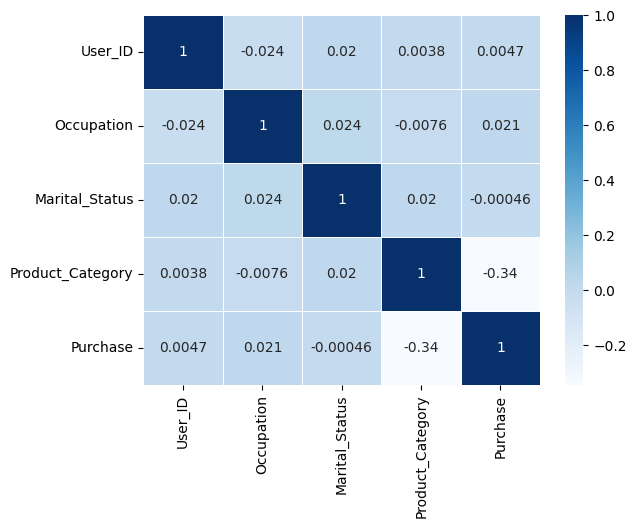

In [ ]:
sns.heatmap(df_original.corr(), annot=True, cmap="Blues", linewidth=.5)

#Section 5.1 Comments on the distribution of the variables and relationship between them

**Distribution**


---


* **Age** Customers are distributed into 7 Age Groups

Top 3 age groups:
26-35: 40%
36-45: 20%
18-25: 18%
Combining all together they have 78% customer

Lowest 4 Age groups:
0-17: 2.7%
36-45: 8.3%
46-55: 7.0%
55+: 3.9%

Combining all together have 21% Customers

* **Gender**
75% are Males
25% are Females

* **Occupation** Total 21 Occupations are there

Top 5 Occupation have the code 4,0,7,1 and 17

* **Product Category** 20 product categories are there
Top 3 are
1 25%
5 27%
8 20%

Only these 3 product category have the max sale that is of 72%

* **Marital_Staus**:
60% are unmarried
40% are married


---


**Relationship**

*   As we can see the Upper Correlation heatmap of the different variable **there is no relationship between them.**


# Section 5.2 Comments for each univariate and bivariate plots

It is Mentioned below the every graph

#section 5.3 Comments on different variables when generalizing it for Population

1. **Gender:** After applying CLT and CI on the gender we can generalize it for the population that the mean Purchase amount of Males(M) is 9440 with the standard error of 86.07 and mean purchase ampunt of Females (F) is 8733 with the standard error of 80.58.

2. **Marital_Status** After studying the CLT ans CI in Marrital Status and generalizing it for the population we can say that the mean purchase amount of Unmarried customers is 9259.31 with standard error of 84.80 and for married customers is 9250.29 with standard error of 84.97. Both are similar

3. **Age** Generalised on population
mean amount purchase of age group


0-17 is 8925.88

18-25 is 9160.96

26-35 is 9245.03

36-45 is 9321.38

46-50 is 9198.31

51-55 is 9521.29

55+ is 9320.94

All have very small range of mean 8925 to 9521. 600 dollar difference around.

#Section 6 Recommendations (10 Points)
#Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1. Male and Female have completely different range of average purchase amount. Based on this actions we can take are:

  1.1 **Gender-Specific Marketing Campaigns:**Create tailored marketing campaigns that resonate with each gender's preferences and interests. This includes using gender-specific messaging, imagery, and advertising channels.

  1.2 **Pricing Strategies:** Fine-tune pricing strategies based on gender preferences. Consider introducing pricing tiers, discounts, or bundled offers that are more appealing to one gender over the other.

  1.3 **Market Expansion:** Consider expanding into new markets or demographics that align with the higher-spending gender group.

2. Married and Unmarried have completely overlapped range of average purchase amount.Based on this actions we can take are:

   2.1 Since there isn't a significant difference in average purchase amounts based on marital status, we may choose not to prioritize marketing campaigns that specifically target one group over the other. Instead, focus on more general marketing strategies that cater to a broader audience.

3. All the Age groups have partially overlapped range of purchase amount.Based on this actions we can take are:

  3.1 51-55 age group has a higher mean purchase amount, they may be willing to spend more on certain products or services. Advertisements and promotions can be designed to appeal to this age group.

  3.2 26-35 age group have the highest percentage of customers and have decent average amount of purchase we can run some loyality programs and give some offers to retain these customers.

4. Product Category sales Count Based actions: 1,5,8 have the highest sales and share 72% of sales alone. Need to keep the stock of the products of these product categories all the time.